In [208]:
## Prep the workspace
library("AzureML")
ws <- workspace()

## load the data: 2013 arrests by county and agency; county pop by race and gender
dat_arrests <- download.datasets(ws, "ca_doj_arrests_deidentified_2013_05-07-2016.csv")
dat_pop <- download.datasets(ws, "ca_county_population_by_race_gender_age_2005-2014_02-05-2016.csv")

In [209]:
## Preview the arrests data
dim(dat_arrests)
names(dat_arrests)
head(dat_arrests)

[1] 1205536      16

[1] "county"                   "agency_name"             
 [3] "agency_code"              "arrest_year"             
 [5] "arrest_month"             "arrest_day"              
 [7] "race_or_ethnicity"        "gender"                  
 [9] "age_group"                "summary_offense_level"   
[11] "offense_level"            "bcs_offense_code"        
[13] "bcs_summary_offence_code" "fbi_offense_code"        
[15] "status_type"              "disposition"

,county,agency_name,agency_code,arrest_year,arrest_month,arrest_day,race_or_ethnicity,gender,age_group,summary_offense_level,offense_level,bcs_offense_code,bcs_summary_offence_code,fbi_offense_code,status_type,disposition
1,Alameda,Alameda Co. Sheriff's Department,0100,2013,1,1,White,male,adult,felony,felony,372,6,04,booked,felony complaint sought
2,Alameda,Alameda Co. Sheriff's Department,0100,2013,1,1,Hispanic,male,adult,felony,felony,372,6,04,booked,felony complaint sought
3,Alameda,Alameda Co. Sheriff's Department,0100,2013,1,1,Hispanic,male,adult,felony,felony,320,6,04,booked,felony complaint sought
4,Alameda,Alameda Co. Sheriff's Department,0100,2013,1,1,Hispanic,male,adult,misdemeanor,misdemeanor,397,30,08,booked,misdemeanor complaint sought
5,Alameda,Alameda Co. Sheriff's Department,0100,2013,1,1,Black,male,adult,misdemeanor,misdemeanor,79,60,26,booked,misdemeanor complaint sought
6,Alameda,Alameda Co. Sheriff's Department,0100,2013,1,1,Black,female,adult,misdemeanor,misdemeanor,46,43,23,booked,misdemeanor complaint sought


In [210]:
## Load necessary libraries
library(dplyr)
library(ggplot2)
library(grid)

In [211]:
## Subset arrests to only juveniles.
dat_juv <- dat_arrests[dat_arrests$age_group %in% "juvenile",]

## Group by county, then by year, then by race/ethnicity and give me the counts.
cty_ethnic <- summarise(group_by(dat_juv, county, arrest_year, race_or_ethnicity), total = n())

## Now remove those records supressed due to privacy concern.
cty_ethnic <- cty_ethnic[!(cty_ethnic$race_or_ethnicity %in% "suppressed_due_to_privacy_concern"),]

## Preview
dim(cty_ethnic)
head(cty_ethnic)
tail(cty_ethnic)

[1] 170   4

,county,arrest_year,race_or_ethnicity,total
1,Alameda,2013,Asian/Pacific Islander,161
2,Alameda,2013,Black,1125
3,Alameda,2013,Hispanic,773
4,Alameda,2013,Other,98
5,Alameda,2013,White,377
6,Butte,2013,Asian/Pacific Islander,8


,county,arrest_year,race_or_ethnicity,total
1,Ventura,2013,White,572
2,Yolo,2013,Asian/Pacific Islander,10
3,Yolo,2013,Black,32
4,Yolo,2013,Hispanic,104
5,Yolo,2013,Other,11
6,Yolo,2013,White,96


In [212]:
## Panel bar charts: ethnic breakdown of arrests, by county.
## NOTE: this is before normalizing by ethnic population.
plot_ethnic <- ggplot(cty_ethnic, aes(x = race_or_ethnicity, y = total, fill = race_or_ethnicity)) + 
                geom_bar(stat = "identity") + coord_flip() + facet_wrap(~county) +  
                theme(axis.text.x=element_text(angle=-90,hjust=1,vjust=0.5, size = 8), axis.text.x=element_text(size = 8),
                      legend.position = "none", strip.text=element_text(size = 8), axis.title.x=element_blank(),
                      axis.title.y=element_blank())

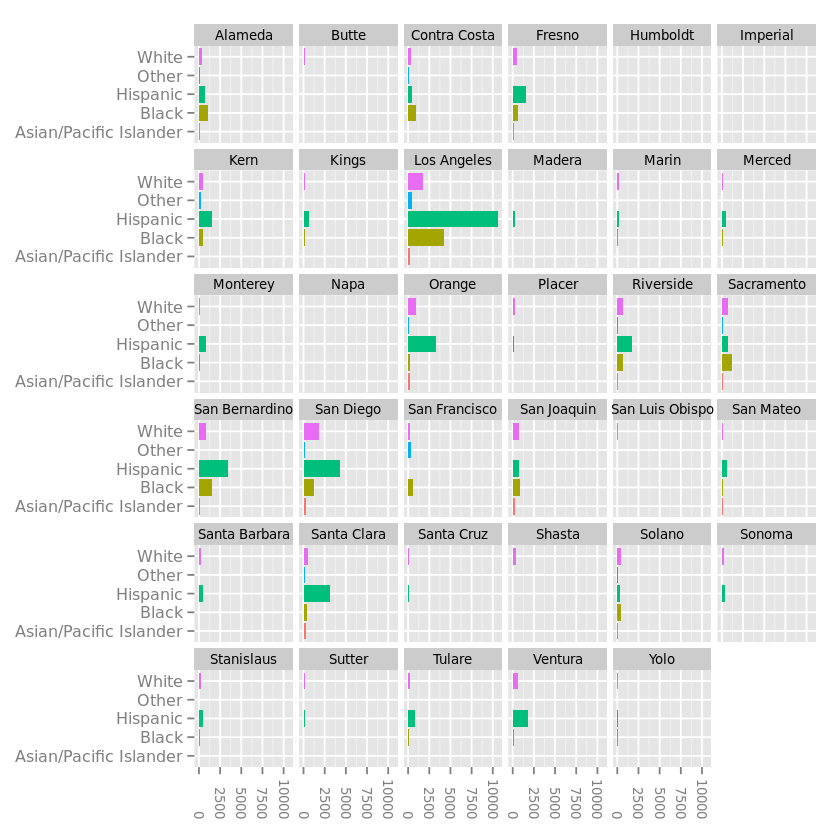

In [213]:
plot_ethnic

In [214]:
## Stacked bar chart: ethnic breakdown of arrests, stacked between counties.
## Again, this is before normalizing by ethnic population.
plot_ethnic2 <- ggplot(cty_ethnic, aes(x = race_or_ethnicity, y = total, fill = county)) + 
                geom_bar(stat = "identity") + coord_flip() + 
                theme(axis.text.x=element_text(angle=-90,hjust=1,vjust=0.5, size = 8), axis.text.x=element_text(size = 8),
                      strip.text=element_text(size = 8), axis.title.x=element_blank(), axis.title.y=element_blank(),
                      legend.text=element_text(size= 6), legend.key.height=unit(.4, "cm"))

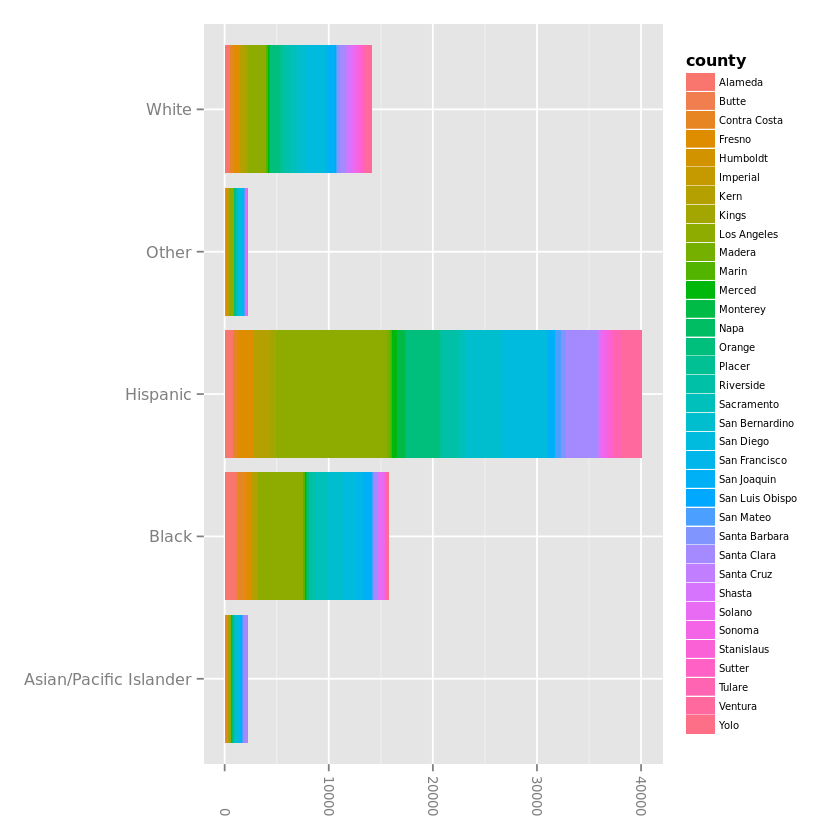

In [215]:
plot_ethnic2

In [216]:
## Now, let's preview the population data
dim(dat_pop)
names(dat_pop)
head(dat_pop, 40)

[1] 148680      6

[1] "year"       "county"     "race"       "gender"     "age_group" 
[6] "population"

,year,county,race,gender,age_group,population
1,2005,Alameda,All Combined,All Combined,All Combined,1459881
2,2005,Alameda,All Combined,All Combined,Juvenile,354877
3,2005,Alameda,All Combined,All Combined,Adult,1105004
4,2005,Alameda,All Combined,All Combined,0-9,192318
5,2005,Alameda,All Combined,All Combined,10-14,101688
6,2005,Alameda,All Combined,All Combined,15-17,60871
7,2005,Alameda,All Combined,All Combined,18-24,144064
8,2005,Alameda,All Combined,All Combined,25-29,108269
9,2005,Alameda,All Combined,All Combined,30-39,233561
10,2005,Alameda,All Combined,All Combined,40-49,231501


In [224]:
## Looks like it's already aggregated along a number of dimensions. 
## Let's subset only the juveniles.
dat_pop_jv <- dat_pop[dat_pop$age_group %in% "Juvenile",]
head(dat_pop_jv)

,year,county,race,gender,age_group,population
2,2005,Alameda,All Combined,All Combined,Juvenile,354877
14,2005,Alameda,All Combined,Female,Juvenile,173570
26,2005,Alameda,All Combined,Male,Juvenile,181307
38,2005,Alameda,Hispanic,All Combined,Juvenile,103616
50,2005,Alameda,Hispanic,Female,Juvenile,50726
62,2005,Alameda,Hispanic,Male,Juvenile,52890


In [225]:
## Ok, now, let's look at arrests of both genders and ignore the 'all combined' county value.
dat_pop_jv <- dat_pop_jv[dat_pop_jv$gender %in% "All Combined" & !(dat_pop_jv$county %in% "All Combined"),]

## Let's also remove the race 'all combined.'
dat_pop_jv <- dat_pop_jv[!(dat_pop_jv$race %in% "All Combined"),]
head(dat_pop_jv,20)

,year,county,race,gender,age_group,population
38,2005,Alameda,Hispanic,All Combined,Juvenile,103616
74,2005,Alameda,Black,All Combined,Juvenile,49014
110,2005,Alameda,White,All Combined,Juvenile,94600
146,2005,Alameda,Asian/Pacific Islander,All Combined,Juvenile,84980
182,2005,Alameda,Native American,All Combined,Juvenile,929
218,2005,Alameda,Other,All Combined,Juvenile,21737
542,2005,Alpine,Hispanic,All Combined,Juvenile,37
578,2005,Alpine,Black,All Combined,Juvenile,0
614,2005,Alpine,White,All Combined,Juvenile,131
650,2005,Alpine,Asian/Pacific Islander,All Combined,Juvenile,0


In [228]:
## Looks like we'll have to do some recoding/classification, if we want to look at
## Native American, Other, or suppressed_due_to_privacy_concern populations.
unique(dat_arrests$race_or_ethnicity)
unique(dat_pop_jv$race)

[1] "White"                             "Hispanic"                         
[3] "Black"                             "Asian/Pacific Islander"           
[5] "Other"                             "suppressed_due_to_privacy_concern"

[1] "Hispanic"               "Black"                  "White"                 
[4] "Asian/Pacific Islander" "Native American"        "Other"

In [ ]:
## I'll join the datasets tomorrow morning, then perform the first statistical test. G'night!